In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import scipy.stats as stats
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# to split the datasets
from sklearn.model_selection import train_test_split

In [93]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']
               

In [94]:
data=pd.read_csv("/content/kaggle_house_pred_train.csv",usecols=cols_to_use)

In [84]:
data.isnull().mean()

MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
Alley          0.937671
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     1460 non-null   object 
 1   LotFrontage  1201 non-null   float64
 2   Street       1460 non-null   object 
 3   Alley        91 non-null     object 
 4   MasVnrArea   1452 non-null   float64
 5   BsmtQual     1423 non-null   object 
 6   BsmtUnfSF    1460 non-null   int64  
 7   FireplaceQu  770 non-null    object 
 8   SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 102.8+ KB


In [ ]:
data['SalePrice'].unique()

In [28]:
data_cpy=data.copy()

# Identify different Type of Variables

In [95]:
categorical_feat=[feat for feat in data.columns if data[feat].dtype=='O' and feat != 'SalePrice']  
categorical_feat

['MSZoning', 'Street', 'Alley', 'BsmtQual', 'FireplaceQu']

In [96]:
discrete_feat = [feat for feat in data.columns if data[feat].dtype != 'O' 
                  and feat != 'SalePrice' and data[feat].nunique() < 10]
discrete_feat                

[]

In [97]:
Continuous_feat = [feat for feat in data.columns if data[feat].dtype != 'O' 
                  and feat != 'SalePrice' and feat not in discrete_feat ]
Continuous_feat

['LotFrontage', 'MasVnrArea', 'BsmtUnfSF']

# Check DIstribution on COntinuous Variables

In [29]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LotFrontage    2.163569
MasVnrArea     2.669084
BsmtUnfSF      0.920268
SalePrice      1.882876
dtype: float64

In [44]:
def draw_distplt(df,feat,tgt_feat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
  
    df[df[feat].isnull()][tgt_feat].plot(kind='kde', ax=ax, color='red')
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = [feat]
    ax.legend(lines, labels, loc='best')
   # add figure title
    plt.title(feat)
    return "succ"

In [45]:
Continuous_feat

['LotFrontage', 'MasVnrArea', 'BsmtUnfSF']

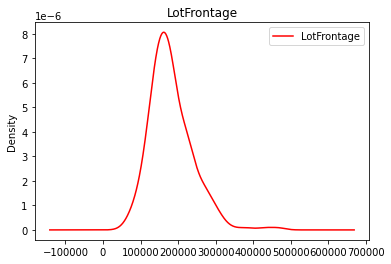

In [46]:
#for feat in Continuous_feat:
val=draw_distplt(data,'LotFrontage','SalePrice')

In [ ]:

val=draw_distplt(dataimp,'LotFrontage','SalePrice')

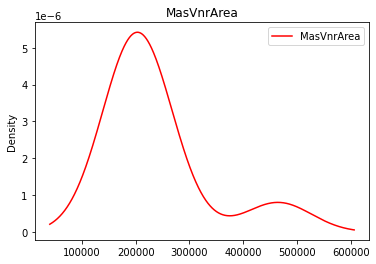

In [47]:
val=draw_distplt(data,'MasVnrArea','SalePrice')

In [ ]:
#val=draw_distplt(data,'BsmtUnfSF','SalePrice')
#data['BsmtUnfSF']+1

In [64]:
data[Continuous_feat].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtUnfSF      0.000000
dtype: float64

In [115]:
preprocessor = ColumnTransformer(transformers=[
    ('numeric_imputer', SimpleImputer(strategy='mean'), Continuous_feat),
     ('categoric_imputer', SimpleImputer(strategy='most_frequent'), categorical_feat)
   ])

In [99]:
preprocessor.fit(data)

ColumnTransformer(transformers=[('numeric_imputer', SimpleImputer(),
                                 ['LotFrontage', 'MasVnrArea', 'BsmtUnfSF']),
                                ('categoric_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['MSZoning', 'Street', 'Alley', 'BsmtQual',
                                  'FireplaceQu'])])

In [100]:
preprocessor.transformers

[('numeric_imputer',
  SimpleImputer(),
  ['LotFrontage', 'MasVnrArea', 'BsmtUnfSF']),
 ('categoric_imputer',
  SimpleImputer(strategy='most_frequent'),
  ['MSZoning', 'Street', 'Alley', 'BsmtQual', 'FireplaceQu'])]

In [101]:
preprocessor.named_transformers_['numeric_imputer'].statistics_

array([ 70.04995837, 103.68526171, 567.24041096])

In [102]:
preprocessor.named_transformers_['categoric_imputer'].statistics_

array(['RL', 'Pave', 'Grvl', 'TA', 'Gd'], dtype=object)

In [103]:
dataimp=preprocessor.transform(data)


In [104]:
dataimp.shape

(1460, 8)

In [105]:
dataimp=pd.DataFrame(dataimp,columns=Continuous_feat + categorical_feat)

In [108]:
dataimp.isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
BsmtUnfSF      0.0
MSZoning       0.0
Street         0.0
Alley          0.0
BsmtQual       0.0
FireplaceQu    0.0
dtype: float64

In [111]:
data.skew(),dataimp.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


(LotFrontage    2.163569
 MasVnrArea     2.669084
 BsmtUnfSF      0.920268
 SalePrice      1.882876
 dtype: float64, LotFrontage    2.384950
 MasVnrArea     2.676412
 BsmtUnfSF      0.920268
 dtype: float64)

Text(0, 0.5, 'Number of houses')

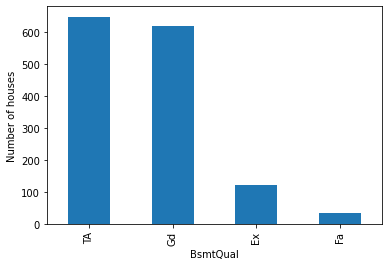

In [112]:
data['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Number of houses')

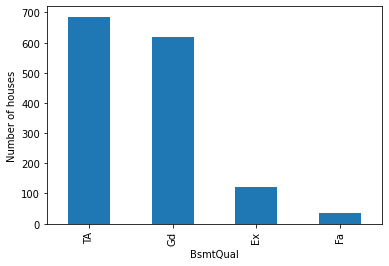

In [113]:
dataimp['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')